In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

In [2]:
# HIDDEN

def sin(theta):
    return np.sin(theta * np.pi/180)
def cos(theta):
    return np.cos(theta * np.pi/180)
def tan(theta):
    return sin(theta)/cos(theta)

def projection_1_2(theta):
    x = 1
    z = 2
    y = x*cos(theta) + z*sin(theta)
    plt.figure(figsize=(6, 6))
    plt.scatter(x, z, s=40, color='green')
    plt.plot([-3, 3], [0, 0], color='grey', lw=2, label=r'$X$'+' axis')
    plt.plot([0, 0], [-3, 3], color='grey', lw=2)
    plt.plot([-3, 3], [tan(theta)*(-3), tan(theta)*3], color='gold', lw=2, label='New axis at positive angle '+r'$\theta$ to the '+r'$X$'+' axis')
    plt.plot([0, x], [0, 0], color='blue', lw=2)
    plt.plot([x, x], [0, z], color='green', linestyle='--', lw=2)
    plt.plot([x, cos(theta)*y], [z, sin(theta)*y], color='green', linestyle='--', lw=2)
    plt.plot([0, cos(theta)*y], [0, sin(theta)*y], color='red', lw=2)         
    plt.axes().set_aspect('equal')
    plt.legend(bbox_to_anchor=(1.92, 1.02))
    plt.xlabel('$X$')
    plt.ylabel('$Z$', rotation=0)
    plt.title('Projection of $(X, Z) = (1, 2)$ on Gold Axis')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    
def projection_trig():
    x = 1
    z = 2
    x1 = x*cos(theta)
    x2 = z*sin(theta)
    y = x1 + x2
    plt.figure(figsize=(8, 8))
    plt.scatter(x, z, s=40, color='green')
    plt.plot([-3, 3], [0, 0], color='grey', lw=2)
    plt.plot([0, 0], [-3, 3], color='grey', lw=2)
    plt.plot([-3, 3], [tan(theta)*(-3), tan(theta)*3], color='gold', lw=2)
    plt.plot([0, x], [0, 0], color='blue', lw=2)
    plt.plot([x, x], [0, z], color='green', linestyle='--', lw=2)
    plt.plot([x, cos(theta)*y], [z, sin(theta)*y], color='green', linestyle='--', lw=2)
    plt.plot([x, cos(theta)*x1], [0, sin(theta)*x1], color='k', linestyle='--', lw=2)
    plt.plot([cos(theta)*y, x+cos(theta)*x2], [sin(theta)*y, sin(theta)*x2], color='k', linestyle='--', lw=2)
    plt.plot([x, x+cos(theta)*x2], [0, sin(theta)*x2], color='k', linestyle='--', lw=2)
    plt.plot([0, cos(theta)*x1], [0, sin(theta)*x1], color='brown', lw=3, label='Length = '+r'$X\cos(\theta)$')
    plt.plot([cos(theta)*x1, cos(theta)*y], [sin(theta)*x1, sin(theta)*y], color='darkblue', lw=3, label='Length = '+r'$Z\sin(\theta)$')
    plt.text(0.3, 0.06, r'$\theta$', fontsize=20)
    plt.text(1.03, 1.6, r'$\theta$', fontsize=20)
    plt.text(0.8, 2.1, r'$(X, Z)$', fontsize=15)
    plt.legend(bbox_to_anchor=(1.35, 1))
    plt.axes().set_aspect('equal')
    plt.xlabel('$X$')
    plt.ylabel('$Z$', rotation=0)
    plt.title('$Y =$ '+r'$X\cos(\theta) + Z\sin(\theta)$')
    plt.xlim(-0.5, 3)
    plt.ylim(-0.5, 3)

## Bivariate Normal Distribution ##

When the joint distribution of $X$ and $Y$ is bivariate normal, the regression line of the previous section does even better than just being the best among all linear predictors of $Y$ based on $X$. In this section we will construct a bivariate normal pair $(X, Y)$ from i.i.d. standard normal variables. In the next section, we will identify the main property of the regression line for bivariate normal $(X, Y)$.

The multivariate normal distribution is defined in terms of a mean vector and a covariance matrix. As you know, normalizing the covariance makes it is easier to interpret. You have shown in exercises that for jointly distributed random variables $X$ and $Y$ the *correlation* between $X$ and $Y$ is defined as

$$
r_{X,Y} ~ = ~ \frac{Cov(X, Y)}{\sigma_X\sigma_Y} ~ = ~ 
E\Big{(}  \frac{X-\mu_X}{\sigma_X}  \cdot \frac{Y-\mu_Y}{\sigma_Y}  \Big{)}
~ = ~ E(X_{su}Y_{su})
$$

where $X_{su}$ is $X$ in standard units and $Y_{su}$ is $Y$ in standard units.

### Properties of Correlation ###
You showed all of these in exercises.

- $r_{X,Y}$ depends only on standard units and hence is a pure number with no units
- $r_{X,Y} = r_{Y,X}$
- $-1 \le r_{X,Y} \le 1$ 
- If $Y = aX + b$ then $r_{X,Y}$ is $1$ or $-1$ according to whether the sign of $a$ is positive or negative. 

We say that $r_{X,Y}$ measures the *linear association* between $X$ and $Y$. 

### Correlation as a Cosine ###
Rewrite the formula for correlation to see that 

$$
Cov(X, Y) ~ = ~ r_{X,Y}\sigma_X\sigma_Y
$$

So the variance of $X+Y$ is

$$
\sigma_{X+Y}^2 ~ = ~ \sigma_X^2 + \sigma_Y^2 + 2r_{X,Y}\sigma_X\sigma_Y
$$

Notice the parallel with the formula for the length of the sum of two vectors, with correlation playing the role of the cosine of the angle between two vectors. If the angle is 90 degrees, the the cosine is 0. This corresponds to correlation being zero and hence the random variables being uncorrelated. 

Later in this section, we will visualize this idea in the case where the joint distribution of $X$ and $Y$ is bivariate normal.

In [3]:
# VIDEO: Construction: Bivariate Normal
from IPython.display import YouTubeVideo

YouTubeVideo('d-ucYswhZ_Q')

In [4]:
# VIDEO: Construction: Standard Bivariate Normal

YouTubeVideo('GQ9nsyr3umI')

### Constructing the Standard Bivariate Normal ###

The goal is to construct $X$ and $Y$ that have the multivariate normal distribution with mean vector $[0 ~ 0]^T$ and covariance matrix 
$\begin{bmatrix}
1 & \rho \\
\rho & 1
\end{bmatrix}$
for some $\rho$ such that $0 < \rho < 1$. We will say that $X$ and $Y$ have the *standard bivariate normal distribution with correlation $\rho$*.

Any bivariate normal vector is a linear transformation of an i.i.d. standard normal vector. Start with two i.i.d. standard normal random variables $X$ and $Z$. We will construct the required bivariate normal random vector $[X ~ Y]^T$ as a linear transformation of the random vector $[X ~ Z]^T$.

First note that since all three of $X$, $Y$, and $Z$ must have mean $0$, the linear transformation has no shift term. We just need to identify numbers $a$, $b$, $c$, and $d$ such that

$$
\begin{bmatrix}
X \\
Y
\end{bmatrix}
~ = ~
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
\begin{bmatrix}
X \\
Z
\end{bmatrix}
$$

Taking $a=1$ and $b=0$ is a good start because it gives us the right first coordinate.

$$
\begin{bmatrix}
1 & 0 \\
c & d
\end{bmatrix}
\begin{bmatrix}
X \\
Z
\end{bmatrix}
~=~
\begin{bmatrix}
X \\
cX+dZ
\end{bmatrix}
$$

Since both $X$ and $Y$ must have variance $1$, the covariance of $X$ and $Y$ is equal to the correlation. So, by the independence of $X$ and $Z$,

$$
\rho ~ = ~ Cov(X, cX+dZ) ~ = ~ cVar(X) = c
$$

So now we have

$$
\begin{bmatrix}
1 & 0 \\
\rho & d
\end{bmatrix}
\begin{bmatrix}
X \\
Z
\end{bmatrix}
~=~
\begin{bmatrix}
X \\
\rho X+dZ
\end{bmatrix}
~ = ~ 
\begin{bmatrix}
X \\
Y
\end{bmatrix}
$$

Since $Var(Y) = 1$, the final condition is $1 = Var(\rho X + dZ) = \rho^2Var(X) + d^2Var(Z) = rho^2 + d^2$. So $d = \sqrt{1 - \rho^2}$ will work, and we have the following result.

- Let $X$ be standard normal.
- Let $Z$ be standard normal, independent of $X$.
- Let $Y = \rho X + \sqrt{1-\rho^2}Z$. 
- Then $X$ and $Y$ have the standard bivariate normal distribution with correlation $\rho$.

It is also true that if $X$ and $Y$ are standard bivariate normal with correlation $\rho$, then there is a standard normal $Z$ independent of $X$ such that $Y = \rho X + \sqrt{1-\rho^2}Z$. The proof is an exercise.

The graph below shows the empirical distribution of 1000 $(X, Y)$ points in the case $\rho = 0.6$. You can change the value of $rho$ and see how the scatter diagram changes. It will remind you of numerous such simulations in Data 8.

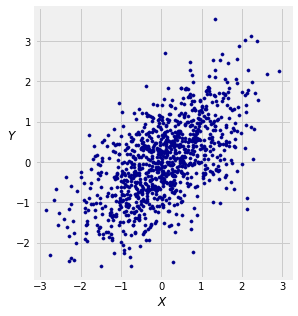

In [5]:
# Plotting parameters
plt.figure(figsize=(5, 5))
plt.axes().set_aspect('equal')
plt.xlabel('$X$')
plt.ylabel('$Y$', rotation=0)
plt.xticks(np.arange(-4, 4.1))
plt.yticks(np.arange(-4, 4.1))

# X, Z, and Y
x = stats.norm.rvs(0, 1, size=1000)
z = stats.norm.rvs(0, 1, size=1000)
rho = 0.6
y = rho*x + np.sqrt((1-rho**2))*z
plt.scatter(x, y, color='darkblue', s=10);

### Representations of the Bivariate Normal ###

When we are working with just two variables $X$ and $Y$, matrix representations are usually unnecessary. We will use the following three representations interchangeably.

- $X$ and $Y$ are bivariate normal with parameters $(\mu_X, \mu_Y, \sigma_X^2, \sigma_Y^2, \rho)$
- The standardized variables $X_{su}$ and $Y_{su}$ are standard bivariate normal with correlation $\rho$. Then $Y_{su} = \rho X_{su} + \sqrt{1-\rho^2}Z$ for some standard normal $Z$ that is independent of $X_{su}$. This follows from Definition 2 of the multivariate normal.
- $X$ and $Y$ have the multivariate normal distribution with mean vector $[\mu_X ~ \mu_Y]^T$ and covariance matrix

$$
\begin{bmatrix}
\sigma_X^2 & \rho\sigma_X\sigma_Y \\
\rho\sigma_X\sigma_Y & \sigma_Y^2
\end{bmatrix}
$$

### Standard Bivariate Normal: Matrix Approach ###
In lab, you used a matrix approach to constructing standard bivariate normal $X$ and $Y$ with correlation $\rho$. Here is a summary of the construction. The end result is the same as what we developed above.

Let $X$ and $Z$ be independent standard normal variables, that is, bivariate normal random variables with mean vector $\mathbf{0}$ and covariance matrix equal to the identity. Now fix a number $\rho$ (that's the Greek letter rho, the lower case r) so that $-1 < \rho < 1$, and let

$$
\mathbf{A} ~ = ~ 
\begin{bmatrix}
1 & 0 \\
\rho & \sqrt{1 - \rho^2}
\end{bmatrix}
$$

Define a new random variable $Y = \rho X + \sqrt{1-\rho^2}Z$, and notice that

$$
\begin{bmatrix}
X \\
Y
\end{bmatrix} 
~ = ~
\begin{bmatrix}
1 & 0 \\
\rho & \sqrt{1 - \rho^2}
\end{bmatrix}
\begin{bmatrix}
X \\
Z
\end{bmatrix}
~ = ~ 
\mathbf{A}
\begin{bmatrix}
X \\
Z
\end{bmatrix}
$$

So $X$ and $Y$ have the bivariate normal distribution with mean vector $\mathbf{0}$ and covariance matrix

$$
\mathbf{AIA}^T ~ = ~ 
\begin{bmatrix}
1 & 0 \\
\rho & \sqrt{1 - \rho^2}
\end{bmatrix}
\begin{bmatrix}
1 & \rho \\
0 & \sqrt{1 - \rho^2}
\end{bmatrix}
~ = ~ 
\begin{bmatrix}
1 & \rho \\
\rho & 1
\end{bmatrix}
$$

### Correlation as a Cosine: Geometry in the Bivariate Normal Case ###
We have defined

$$
Y ~ = ~ \rho X + \sqrt{1 - \rho^2} Z
$$
where $X$ and $Z$ are i.i.d. standard normal.

Let's understand this construction geometrically. A good place to start is the joint density of $X$ and $Z$, which has circular symmetry.

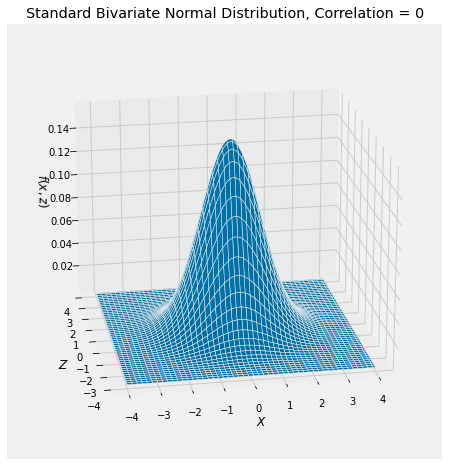

In [6]:
# NO CODE

Plot_bivariate_normal([0, 0], [[1, 0], [0, 1]])
plt.xlabel('$X$')
plt.ylabel('$Z$')
plt.gca().set_zlabel('$f(x, z)$')
plt.title('Standard Bivariate Normal Distribution, Correlation = 0');

The $X$ and $Z$ axes are orthogonal. Let's see what happens if we twist them. 

Take any positive angle $\theta$ degrees and draw a new axis at angle $\theta$ to the original $X$ axis. Every point $(X, Z)$ has a *projection* onto this axis. 

The figure below shows the projection of the point $(X, Z) = (1, 2)$ onto the gold axis which is at an angle of $\theta$ degress to the $X$ axis. The blue segment is the value of $X$. You get that by dropping the perpendicular from $(1, 2)$ to the horizontal axis. That's called *projecting* $(1, 2)$ onto the horizontal axis. 

The red segment is the projection of $(1, 2)$ onto the gold axes, obtained by dropping the perpendicular from $(1, 2)$ to the gold axis.

Vary the values of $\theta$ in the cell below to see how the projection changes as the gold axis rotates.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


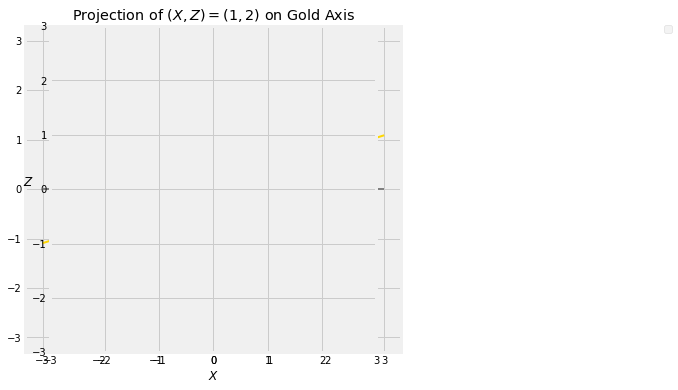

In [7]:
theta = 20
projection_1_2(theta)

Let $Y$ be the length of the red segment, and remember that $X$ is the length of the blue segment. When $\theta$ is very small, $Y$ is almost equal to $X$. When $\theta$ approaches 90 degrees, $Y$ is almost equal to $Z$.

A little trigonometry shows that $Y ~ = ~ X \cos(\theta) + Z\sin(\theta)$.

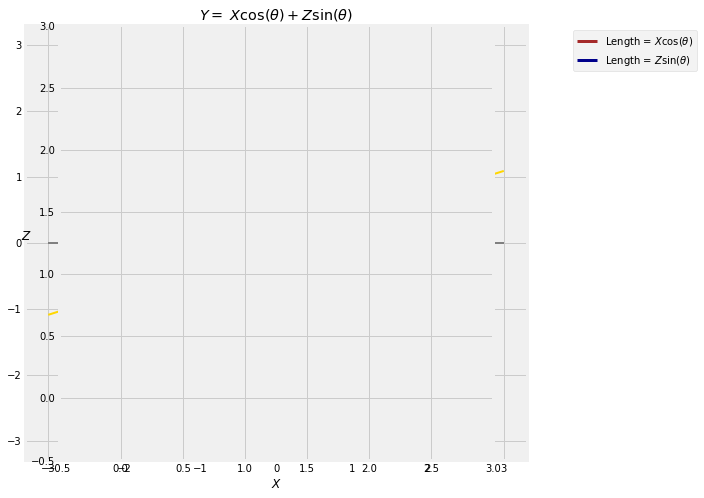

In [8]:
projection_trig()

Thus

$$
Y ~ = ~ X\cos(\theta) + Z\sin(\theta) ~ = ~ \rho X + \sqrt{1 - \rho^2}Z
$$

where $\rho = \cos(\theta)$.

The sequence of graphs below illustrates the transformation for $\theta = 30$ degrees.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


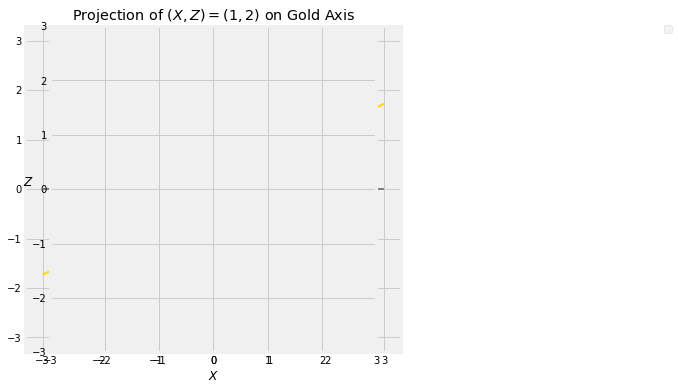

In [9]:
theta = 30
projection_1_2(theta)

The bivariate normal distribution is the joint distribution of the blue and red lengths $X$ and $Y$ when the original point $(X, Z)$ has i.i.d. standard normal coordinates. This transforms the circular contours of the joint density surface of $(X, Z)$ into the elliptical contours of the joint density surface of $(X, Y)$. 

In [10]:
cos(theta), (3**0.5)/2

(0.86602540378443871, 0.8660254037844386)

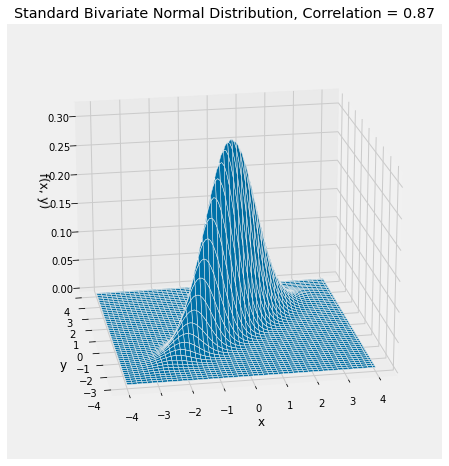

In [11]:
rho = cos(theta)
Plot_bivariate_normal([0, 0], [[1, rho], [rho, 1]])
plt.title('Standard Bivariate Normal Distribution, Correlation = '+str(round(rho, 2)));

### Small $\theta$ ###

As we observed earlier, when $\theta$ is very small there is hardly any change in the position of the axis. So $X$ and $Y$ are almost equal. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


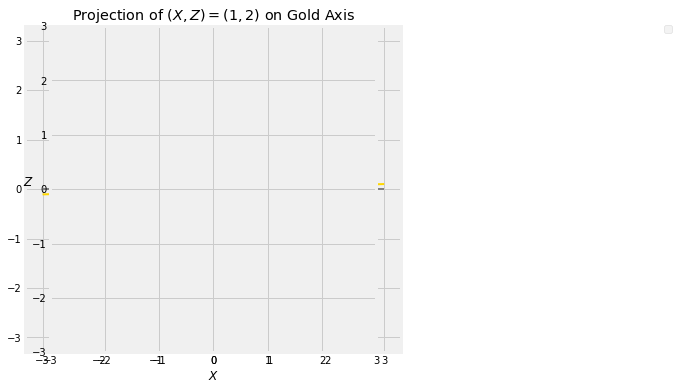

In [12]:
theta = 2
projection_1_2(theta)

The bivariate normal density of $X$ and $Y$, therefore, is essentially confined to the $X = Y$ line. The correlation $\cos(\theta)$ is large because $\theta$ is small; it is more than 0.999. 

You can see the plotting function having trouble rendering this joint density surface.

In [13]:
rho = cos(theta)
rho

0.99939082701909576

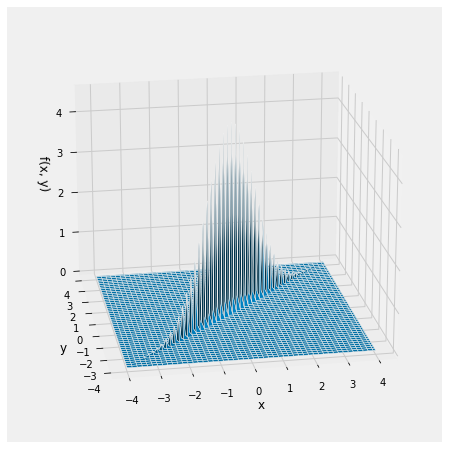

In [14]:
Plot_bivariate_normal([0, 0], [[1, rho], [rho, 1]])

### Orthogonality and Independence ###
When $\theta$ is 90 degrees, the gold axis is orthogonal to the $X$ axis and $Y$ is equal to $Z$ which is independent of $X$.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


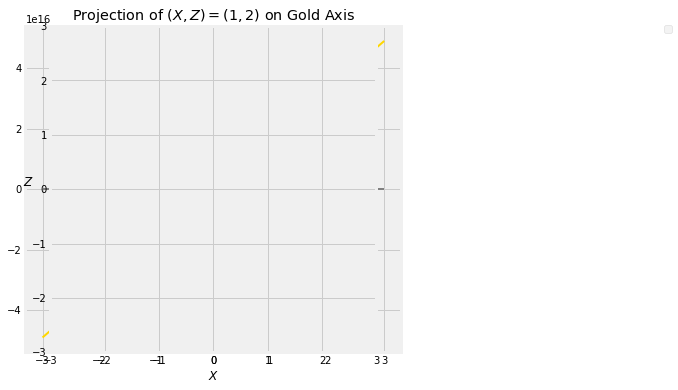

In [15]:
theta = 90
projection_1_2(theta)

When $\theta = 90$ degrees, $\cos(\theta) = 0$. The joint density surface of $(X, Y)$ is the same as that of $(X, Z)$ and has circular symmetry.

If you think of $\rho X$ as a "signal" and $\sqrt{1-\rho^2}Z$ as "noise", then $Y$ can be thought of as an observation whose value is "signal plus noise". In the rest of the chapter we will see if we can separate the signal from the noise.